_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [87]:
import pandas as pd
avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
avocado = pd.read_csv(avocado_url)
assert avocado.shape == (169, 2)
avocado.head()

,Date,Total Volume
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



In [88]:
avocado = avocado.rename(columns={'Date':'ds', 'Total Volume': 'y'})

avocado.head()

,ds,y
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


In [90]:
from fbprophet.diagnostics import cross_validation

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m = Prophet(daily_seasonality=False)
m.fit(avocado)
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon='90 days', period='45 days', initial='730 days')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


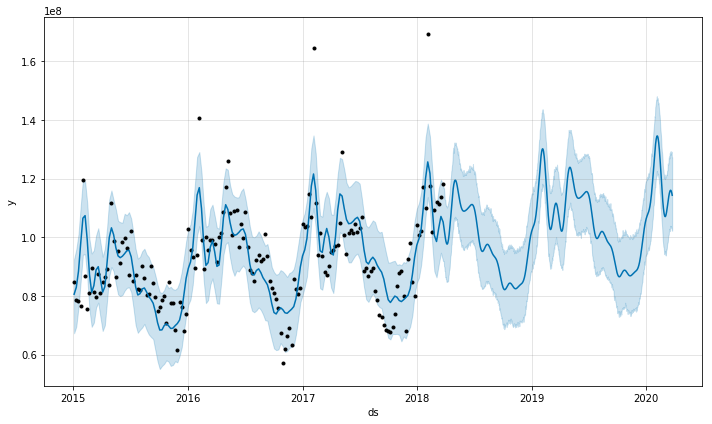

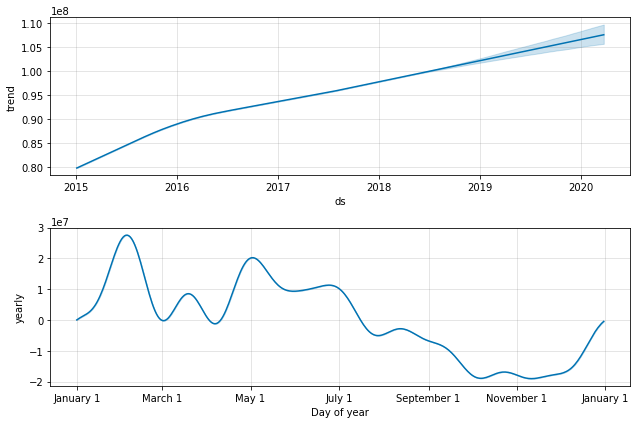

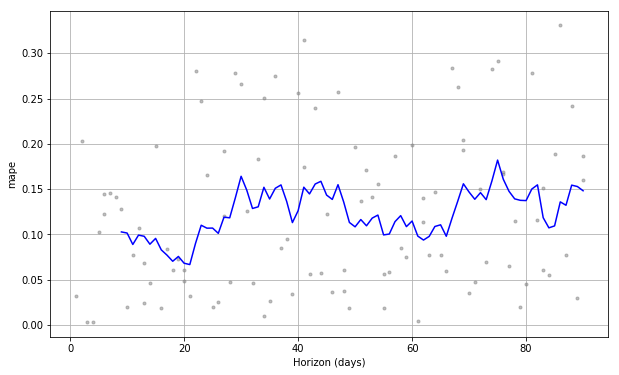

In [91]:
future = m.make_future_dataframe(periods=730)
forecast = m.predict(future)
import matplotlib.pyplot as plt


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

In [92]:
from fbprophet.diagnostics import performance_metrics
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,coverage
0,9 days,1.158354e+14,1.076269e+07,9.050419e+06,0.102819,0.5
1,10 days,1.153774e+14,1.074139e+07,8.954063e+06,0.101604,0.5
2,11 days,8.981248e+13,9.476945e+06,7.979616e+06,0.088963,0.6
3,12 days,9.503492e+13,9.748585e+06,8.671075e+06,0.099294,0.6
4,13 days,9.551160e+13,9.773004e+06,8.876740e+06,0.098013,0.6


### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

In [109]:
m = Prophet(daily_seasonality=False, yearly_seasonality=20)
#m.add_country_holidays(country_name = 'US') #-> Worse results
m.fit(avocado)
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon='90 days', period='45 days', initial='730 days')
performance_metrics(df_cv).head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,9 days,7.840930e+13,8.854903e+06,7.219010e+06,0.083155,0.7
1,10 days,7.883272e+13,8.878779e+06,7.251819e+06,0.083044,0.7
2,11 days,4.534508e+13,6.733875e+06,5.965507e+06,0.067200,0.8
3,12 days,4.703668e+13,6.858329e+06,6.175066e+06,0.071555,0.8
4,13 days,4.920076e+13,7.014325e+06,6.265235e+06,0.070232,0.8


## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [49]:
import pandas as pd
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)
rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price
0,2016,6,3,1.5,40.7145,-73.9425,3000
1,2016,6,2,1.0,40.7947,-73.9667,5465
2,2016,4,1,1.0,40.7388,-74.0018,2850
3,2016,4,1,1.0,40.7539,-73.9677,3275
4,2016,4,4,1.0,40.8241,-73.9493,3350


### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

rent['mean_baseline'] = rent['price'].mean()
y = rent['price']

mae = mean_absolute_error(y, rent['mean_baseline'] )
r2 = r2_score(y, rent['mean_baseline'])
print(f'MAE: {mae}\tR^2: {r2}')

MAE: 1055.7857771080928	R^2: 0.0


In [68]:
from sklearn.linear_model import LinearRegression

features = ['bathrooms', 'bedrooms']
target = 'price'
model = LinearRegression()
train = rent[(rent['month'] == 4)|(rent['month'] == 5)]
test = rent[rent['month'] == 6]
model.fit(train[features], train[target])
y = test[target]
y_pred = model.predict(test[features])
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'MAE: {mae}\tR^2: {r2}')

print('Coefficients: ',  model.coef_)
print('Intercept: ',  model.intercept_)

MAE: 754.0733041489017	R^2: 0.4613584851907725
Coefficients:  [1531.76264753  420.5097168 ]
Intercept:  994.3062975058251


In [79]:
#Stretch
from itertools import combinations
import numpy as np
#Let's try all 3-feature combinations
results = []
features = ['bathrooms', 'bedrooms', 'latitude', 'longitude']
for feats in combinations(features, 3):
    model = LinearRegression()
    model.fit(train[list(feats)], train[target])
    y_pred = model.predict(test[list(feats)])
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    mean_squared_error
    print(f'Features: {feats}', )
    print(f'MAE: {mae}\tR^2: {r2}\tRMSE: {rmse}\n')
    results.append({'features': feats, 'MAE': mae, 'R^2': r2, 'RMSE': rmse})

#And the winner is:
best = min(results, key=lambda x: x['RMSE'])
print(f'Best(RMSE) 3-Feature Combination: {best["features"]}')

Features: ('bathrooms', 'bedrooms', 'latitude')
MAE: 746.7235225517624	R^2: 0.46499732949782835	RMSE: 1028.3411023863466

Features: ('bathrooms', 'bedrooms', 'longitude')
MAE: 666.8097241248772	R^2: 0.561965295975743	RMSE: 930.4937911683246

Features: ('bathrooms', 'latitude', 'longitude')
MAE: 752.0323553309971	R^2: 0.4787000073252834	RMSE: 1015.0865636874619

Features: ('bedrooms', 'latitude', 'longitude')
MAE: 768.4825384477477	R^2: 0.4120970232281952	RMSE: 1077.9833410695774

Best(RMSE) 3-Feature Combination: ('bathrooms', 'bedrooms', 'longitude')
